## Problem 0
The file mutualFunds.csv contains a list of mutual fund symbols and their respective classes.  Extract the data for September 1, 2012 – September 1, 2017.  The python package https://pypi.python.org/pypi/fix-yahoo-finance/0.0.19 may be useful for this purpose, but any method is fair game.  We found that the Google equivalent works great for stocks but doesn't work for mutual funds.  We also found that Yahoo messed up its service in May 2017 so half the packages out there no longer work.  

Since these are mutual funds, there are no intra-day prices so you can use the closing prices.  Note that Yahoo's service is not perfect in that it may return $0.00 or null or NA values for some days.  In such cases, interpolate the results by using the average of the surrounding values as you see fit.

For this problem, you may need the following:
pip install pandas-datareader
pip install yahoo-finance
pip install fix_yahoo_finance --upgrade --no-cache-dir


Print out the first two weeks of OAKMX

In [276]:
# cell block to import needed libraries
%matplotlib inline 

import matplotlib.cm as cm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

from io import StringIO
import requests
import json

from io import BytesIO  
import requests  
import json  

import datetime
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

from yahoo_finance import Share
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf


from scipy.cluster.hierarchy import fcluster

import datetime
import seaborn as sns;
from scipy import stats
import scipy.cluster.hierarchy as hac

import warnings

import sklearn
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn import datasets

import seaborn
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.graphics.api as smg
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, periodogram
from statsmodels.graphics.gofplots import qqplot

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from matplotlib.colors import ListedColormap

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

In [277]:
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),            
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

cmap_set1 = ListedColormap(['#e41a1c', '#377eb8', '#4daf4a'])
dark2_cmap=ListedColormap(dark2_colors)

In [5]:
# code for running in local

df_timeSeries1 = pd.read_csv('timeSeries1.csv')
df_timeSeries2 = pd.read_csv('timeSeries2.csv')

<a id ='Problem-4'></a>

## Problem 4  Time Series Modeling A (17 points)
Use the data timeSeries1.csv for this problem.

[Back to top](#top)

### Problem 4a

<a id="Problem-4a"></a>
Plot the data and perform an exploratory analysis on the raw time series file.  Comment on any trends, outliers, seasonality, whether it's stationary, etc. 


In [32]:
#check data shape and structure
print(df_timeSeries1.shape)
df_timeSeries1.head()

(750, 2)


,Unnamed: 0,x
0,1,-1.033257
1,2,-0.498029
2,3,1.036952
3,4,2.451795
4,5,7.359030


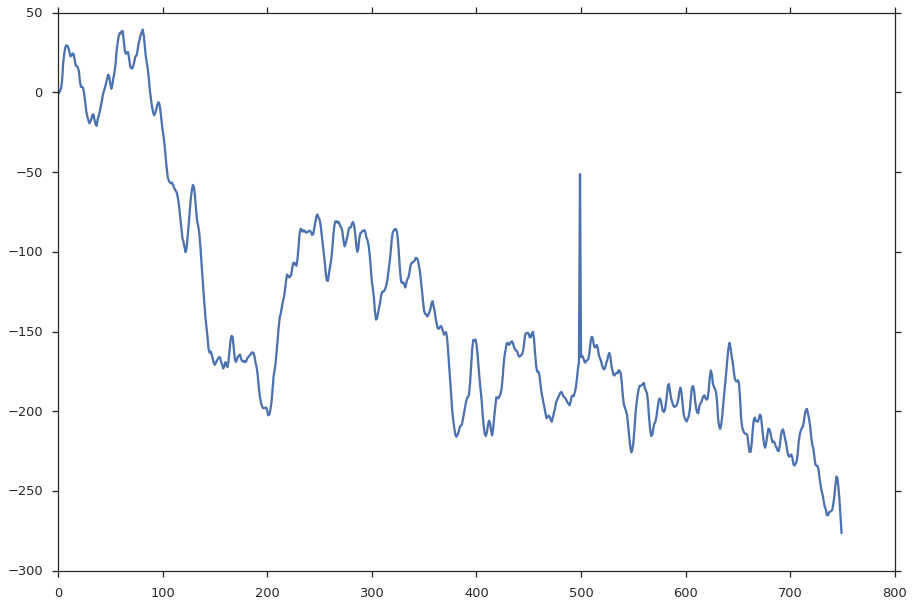

In [512]:
#simple plot 
plt.figure(figsize=(15, 10))
plt.plot(df_timeSeries1['x'])

###### *Observation:*
It is clearly that there is an overall decreasing trend in the data along with no significant seasonal variations. Suspected anomalies can be found arround 500.

Next, we plot the pattern of ACF and PACF for original data.

In [513]:

# function adopted form Section 3
# function to plot original data, ACF, PACF and Ljung-Box statistic
seaborn.set(style='ticks', context='talk')

def tsplot(y, lags=None, figsize=(12, 12)):
    
    q, p = sm.stats.diagnostic.acorr_ljungbox(y,lags)
    fig = plt.figure(figsize=figsize)
    layout = (4, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    qq_ax = plt.subplot2grid(layout, (2, 0), colspan=2, title='QQ plot')
    lbox_ax = plt.subplot2grid(layout, (3, 0), colspan=2, title='Ljung-Box statistic')

    y.plot(ax=ts_ax, title='Residuals')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)

    qqplot(y.sort_values(),  line='q', ax=qq_ax, fit=True)
    #qqplot(y,  line='q', ax=qq_ax, fit=True)
    if np.max(p) > 0.05:
        lbox_ax.axhline(y=0.05, xmin=0, xmax=lags, c ='r')
    lbox_ax.plot(p)
    seaborn.despine()
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax, lbox_ax

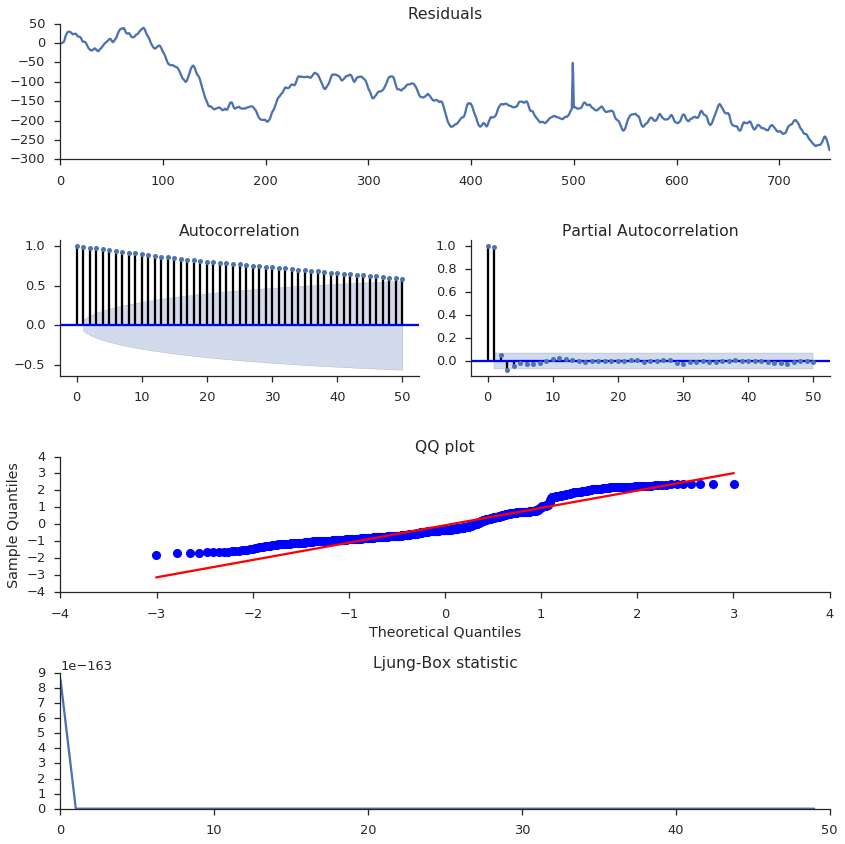

In [514]:
# plot raw data
_ = tsplot(df_timeSeries1['x'], 50)

In [515]:
#function to test Stationarity of a time series data
def test_stationarity(timeseries):    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [516]:
# Dickey-Fuller Test for stationarity
test_stationarity(df_timeSeries1['x'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.645673
p-value                          0.459298
#Lags Used                       3.000000
Number of Observations Used    746.000000
Critical Value (10%)            -2.568837
Critical Value (1%)             -3.439146
Critical Value (5%)             -2.865422
dtype: float64


###### *Observation:*

1. If the data series has positive autocorrelations (AFC) out to a high number of lags (50), suggesting differencing is needed. No seasonal pattern was seen in ACF and PACF plot.

2. The test statistic in Dickey-Fuller Test is much higher than the critical values. So the origin data is not a stationary series.

Next, we will try to figure out ways to make the data series stationary inorder to fit a ARIMA model.

Two approaches were used: differencing and log differencing.


In [517]:
df_timeSeries1['logx'] = np.log(df_timeSeries1['x'] + 300) # As some values are negative so can not take log, add 300 to each x 
df_timeSeries1['dx']= df_timeSeries1['x'].diff() # differencing 
df_timeSeries1['dlogx']= df_timeSeries1['logx'].diff() #log differencing.
df_timeSeries1.dropna(inplace=True)
df_timeSeries1.head()
print(df_timeSeries1.shape)

(749, 5)


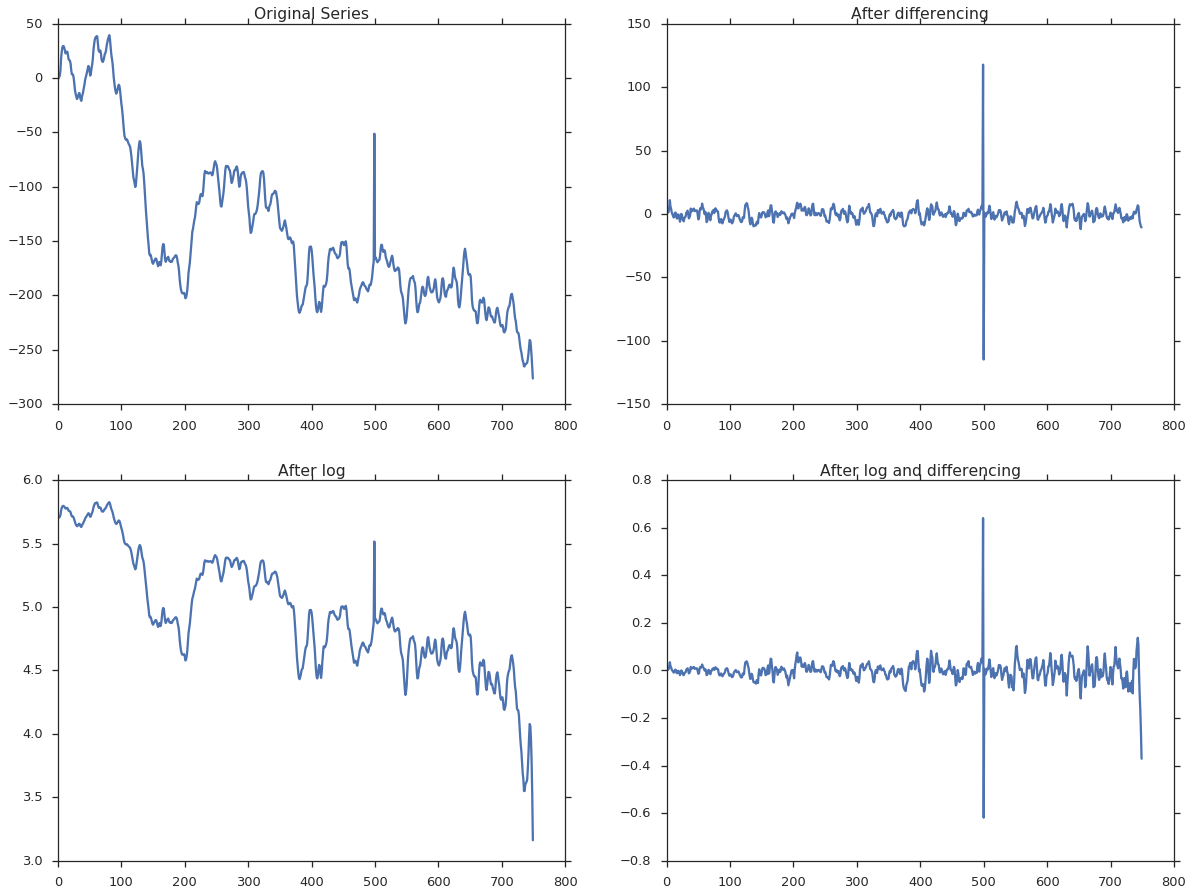

In [518]:
#Plot original data and transformed data
f, ax = plt.subplots(2, 2,figsize=(20, 15))
ax[0,0].plot(df_timeSeries1['x']);
ax[0,0].set_title('Original Series')

ax[0,1].plot(df_timeSeries1['dx']);
ax[0,1].set_title('After differencing')

ax[1,0].plot(df_timeSeries1['logx']);
ax[1,0].set_title('After log');

ax[1,1].plot(df_timeSeries1['dlogx']);
ax[1,1].set_title('After log and differencing');

###### *Observation:*

Differencing transformed data series seems to be more stationary than differencing-log transformed data series.

Then, Dickey-Fuller Test was operformed to test stationary of the transformations.

In [69]:
#Dickey-Fuller Test for differencing transformation
test_stationarity(df_timeSeries1['dx'])

Results of Dickey-Fuller Test:
Test Statistic                -1.277226e+01
p-value                        7.725428e-24
#Lags Used                     2.000000e+00
Number of Observations Used    7.450000e+02
Critical Value (10%)          -2.568840e+00
Critical Value (1%)           -3.439158e+00
Critical Value (5%)           -2.865427e+00
dtype: float64


In [70]:
#Dickey-Fuller Test for log differencing transformation
test_stationarity(df_timeSeries1['dlogx'])

Results of Dickey-Fuller Test:
Test Statistic                -9.276024e+00
p-value                        1.288347e-15
#Lags Used                     9.000000e+00
Number of Observations Used    7.380000e+02
Critical Value (10%)          -2.568860e+00
Critical Value (1%)           -3.439242e+00
Critical Value (5%)           -2.865464e+00
dtype: float64


###### *Observation:*

Both transformation methods have Dickey-Fuller test statistic smaller than the 1% critical values, suggesting both transformed dataset are very close to stationary. The differencing transformation has even smaller test statistic than log differencing transformation, so this former transformation method is used for following model building.

### Problem 4b

[back to top](#top)

<a id="Problem-4b"></a>

Using your knowledge of ACF, PACF and other diagnostics, walk us through the selection of an appropriate ARIMA model for the data.  We are interested in both the result and your logical journey to reach that model.  The insight-free brute force method of trying every possible model is not what we are looking for here.  Be sure to include the final equation of your model.

#### plot ACF and PACF for differencing transformation data

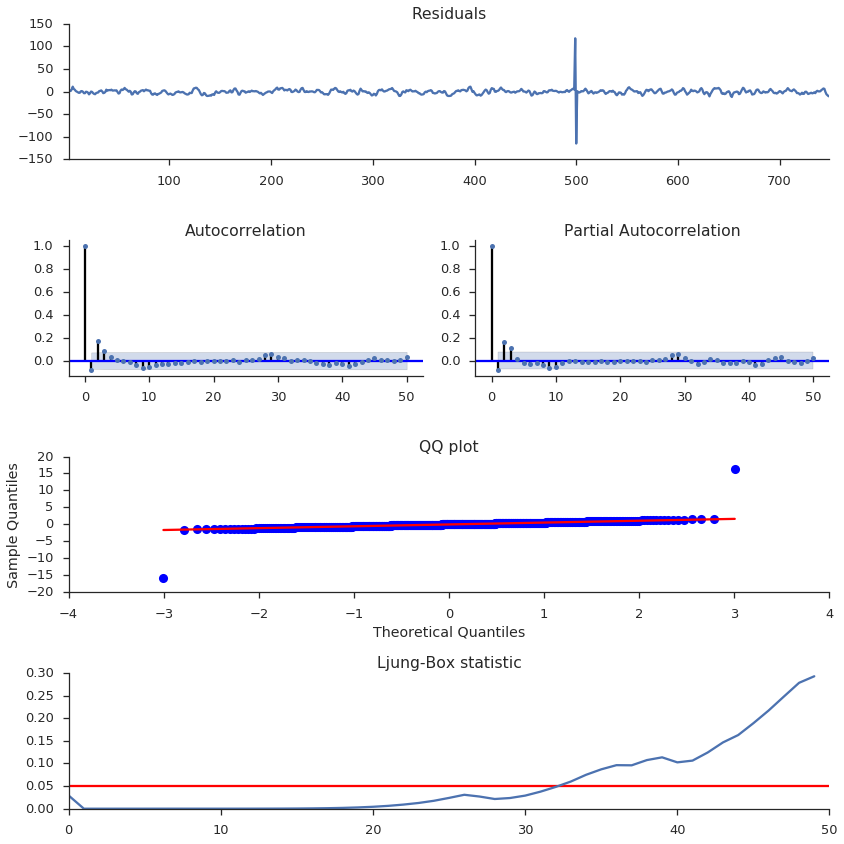

In [519]:
# plot ACF and PACF for differencing transformation data
_ = tsplot(df_timeSeries1['dx'] , 50)

###### *Observation:*

According to the rules for identifying parameters for ARIMA models:

1. ACF becomes zero after lag = 3, so q= 3

2. PACF becomes almost zero after lag = 4, so p = 4

3. d is the order of differencing, so d=1 if 'x' is used for model fitting, d=0 if 'dx' is used fro model fitting.

ARIMA model was built using 'x' as follow:


In [520]:
mod = smt.ARIMA(df_timeSeries1['x'].values, order=(4,1,3))
results_ARIMA = mod.fit()
print (results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  748
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -2522.160
Method:                       css-mle   S.D. of innovations              7.048
Date:                Sat, 30 Sep 2017   AIC                           5062.319
Time:                        15:23:08   BIC                           5103.876
Sample:                             1   HQIC                          5078.334
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3798      0.243     -1.561      0.119      -0.857       0.097
ar.L1.D.y      1.0336      0.877      1.179      0.239      -0.685       2.753
ar.L2.D.y      0.2000      1.269      0.158      0.8

### Problem 4c

[back to top](#top)

<a id="Problem-4c"></a>
Apply and show the appropriate diagnostics to the model to assert that it is valid.  Include not just a plot but your interpretation of the plot in your justification.

##### Residuals from the fitted ARIMA model were used for calculation of ACF, PACF and Ljung-Box statistics for diagnostics.

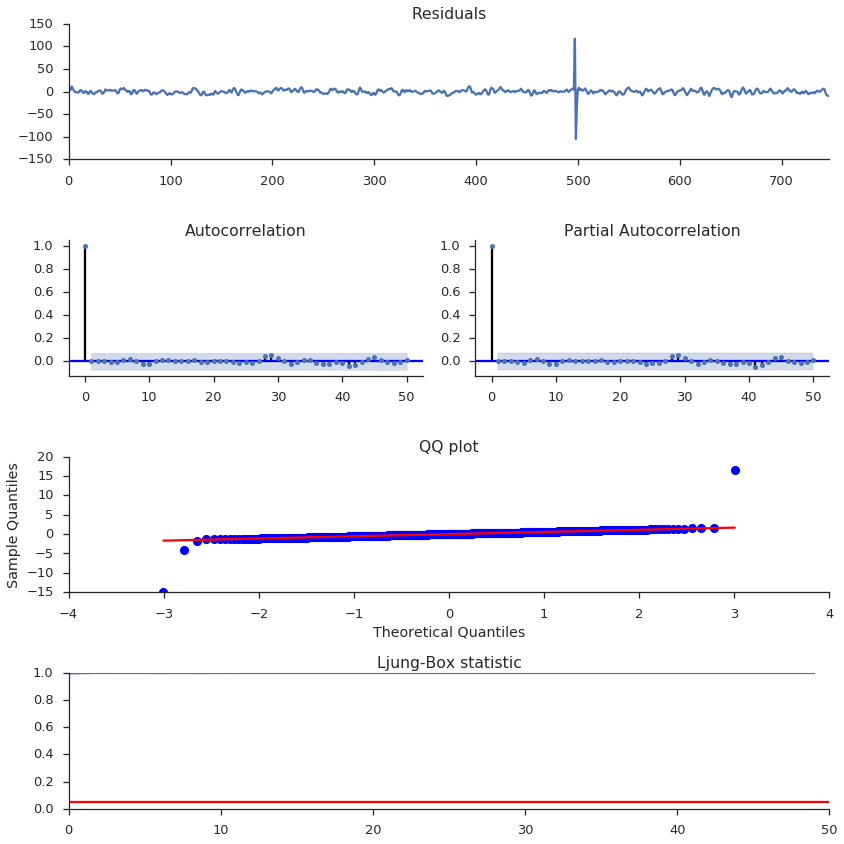

In [522]:
resid = pd.Series(results_ARIMA.resid)
_ = tsplot(resid, 50)

###### *Observation from above diagnose plot:*

1. The run sequence plot of residuals from the ARIMA(4,1,3) shows that except a few anomalies, most residuals do not violate the assumption of constant location and scale.

2. The autocorrelation plot (ACF and PACF) shows that for the first 50 lags, all sample autocorrelations except lags 1 fall inside the 95 % confidence bounds indicating the residuals appear to be random.

3. We apply the Ljung-Box test to the residuals from the ARIMA(4,1,3) model fit to determine whether residuals are random. The result sjows that for the first 50 lag, all Ljung_Box statistic are around 1 (much higher than 0.05 threshold), indicating that the residuals are random.

###### *Conclusion based on diagnose:*

The ARIMA(4,1,3) model provides an adequate fit to the data


### explore more options:

According to "rules for identifying ARIMA models"(https://people.duke.edu/~rnau/arimrule.htm), "It is possible for an AR term and an MA term to cancel each other's effects, so if a mixed AR-MA model seems to fit the data, also try a model with one fewer AR term and one fewer MA term--particularly if the parameter estimates in the original model require more than 10 iterations to converge. BEWARE OF USING MULTIPLE AR TERMS AND MULTIPLE MA TERMS IN THE SAME MODEL."

Next, we tried several more options:

#### 1. model with one fewer AR term and one fewer MA term

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  748
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2522.442
Method:                       css-mle   S.D. of innovations              7.051
Date:                Sat, 30 Sep 2017   AIC                           5058.885
Time:                        15:25:10   BIC                           5091.207
Sample:                             1   HQIC                          5071.341
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3800      0.246     -1.546      0.122      -0.862       0.102
ar.L1.D.y      1.4251      0.107     13.363      0.000       1.216       1.634
ar.L2.D.y     -0.2962      0.116     -2.548      0.0

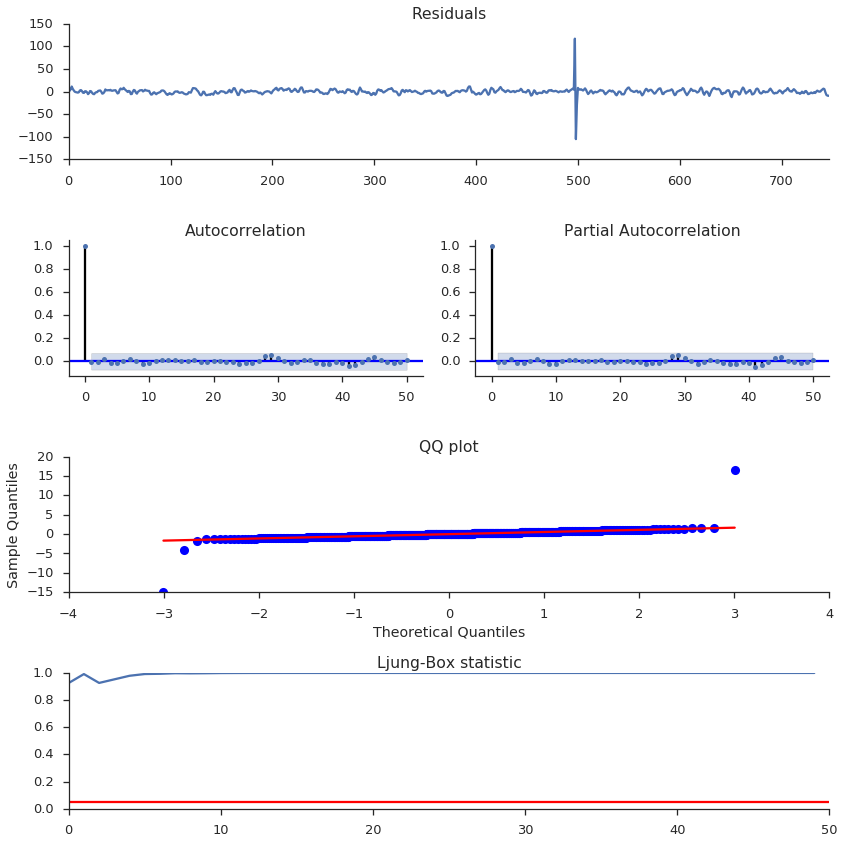

In [523]:
mod_2 = smt.ARIMA(df_timeSeries1['x'].values, order=(3,1,2))
results_ARIMA_2 = mod_2.fit()
print (results_ARIMA_2.summary())
resid_2 = pd.Series(results_ARIMA_2.resid)
_ = tsplot(resid_2, 50)

#### 2. model with multiple AR term and 1 term for MA

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  748
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -2525.467
Method:                       css-mle   S.D. of innovations              7.080
Date:                Sat, 30 Sep 2017   AIC                           5062.935
Time:                        15:25:43   BIC                           5090.639
Sample:                             1   HQIC                          5073.611
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3762      0.328     -1.147      0.252      -1.019       0.266
ar.L1.D.y      0.0228      0.256      0.089      0.929      -0.480       0.525
ar.L2.D.y      0.1800      0.040      4.555      0.0

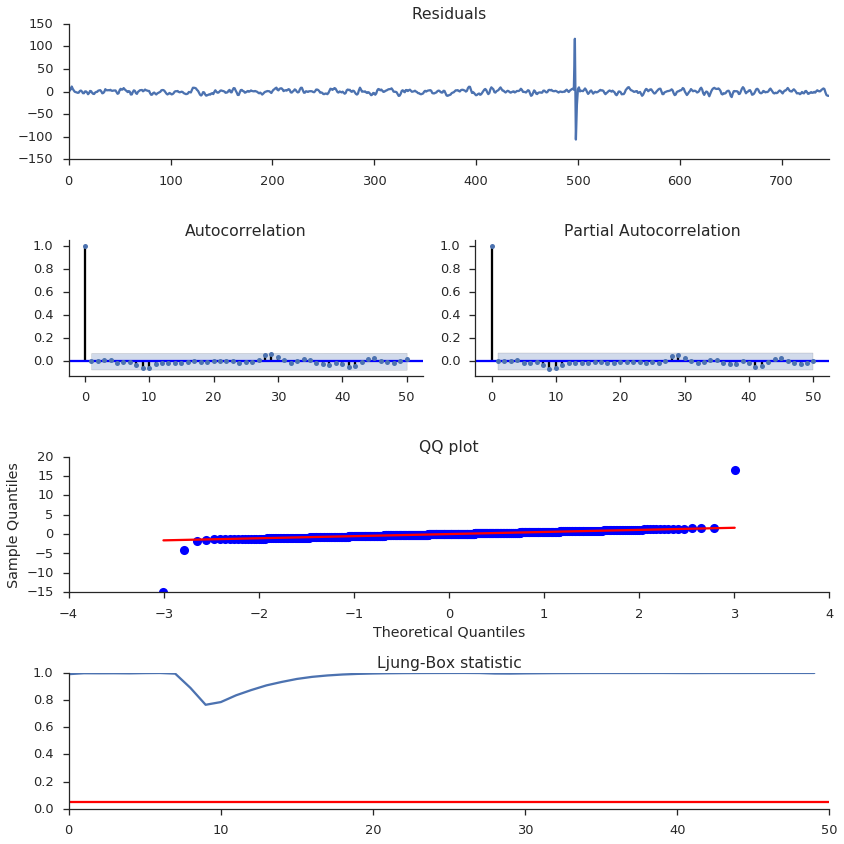

In [524]:
mod_3 = smt.ARIMA(df_timeSeries1['x'].values, order=(3,1,1))
results_ARIMA_3 = mod_3.fit()
print (results_ARIMA_3.summary())
resid_3 = pd.Series(results_ARIMA_3.resid)
_ = tsplot(resid_3, 50)

#### 3. model with multiple MA term and 1 term for AR

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  748
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -2525.159
Method:                       css-mle   S.D. of innovations              7.077
Date:                Sat, 30 Sep 2017   AIC                           5060.318
Time:                        15:26:12   BIC                           5083.405
Sample:                             1   HQIC                          5069.215
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3764      0.323     -1.165      0.244      -1.010       0.257
ar.L1.D.y      0.4614      0.142      3.256      0.001       0.184       0.739
ma.L1.D.y     -0.5486      0.140     -3.931      0.0

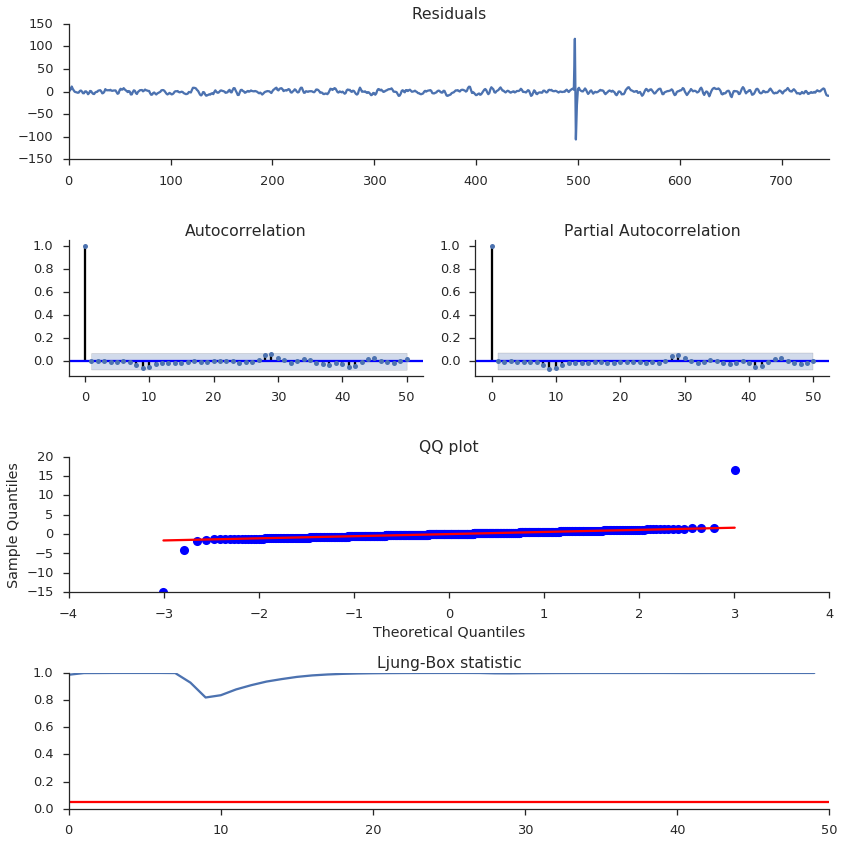

In [525]:
mod_4 = smt.ARIMA(df_timeSeries1['x'].values, order=(1,1,2))
results_ARIMA_4 = mod_4.fit()
print (results_ARIMA_4.summary())
resid_4 = pd.Series(results_ARIMA_4.resid)
_ = tsplot(resid_4, 50)

###### *Observation:* 

1. All three models ARIMA(3,1,2), ARIMA(3,1,1) and ARIMA(1,1,2) provide adequate fits to the data. Although the Ljung_box statistics from these three model are somehow 'lower' than the original model ARIMA(4,1,3), they all non-significant by shifting far away from 0.05 threshold.

2. Based on the rule that including multiple AR and MA terms in the same model is not good, reduced ARIMA(3,1,1) and ARIMA(1,1,2) here are better options for the dataset.

3. We chose ARIMA(1,1,2) as the final model because it provides adequate fits to the data and is the simplest one among all model we tested.


The equation for model ARIMA(1,1,2) is:

$X_t =c +  X_{t-1} + \phi_1 (X_{t-1} - X_{t-2}) + \epsilon_t + \alpha_1 \epsilon_{t-1} + \alpha_2 \epsilon_{t-2}$

$c$ is  a constant and $\epsilon$ is the white noise $∼ IID(0, \sigma^2)$.

### Problem 4d

[back to top](#top)

<a id="Problem-4d"></a>
Predict and plot the next 100 data points.

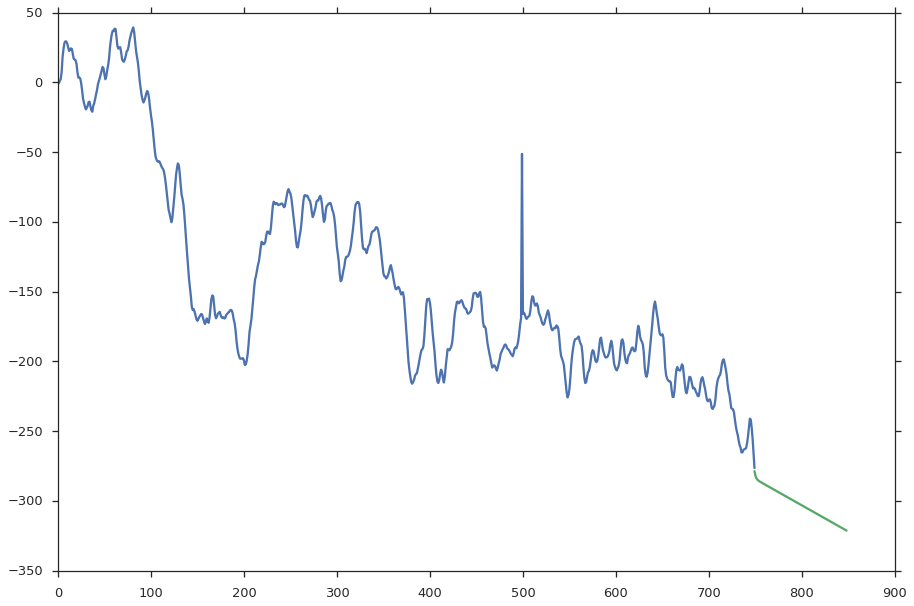

In [526]:
#plot next 100 data point of log x
# use simplest reduced model ARIMA(1,1,2) was used here
plt.figure(figsize=(15, 10))
pred = pd.DataFrame(results_ARIMA_4.forecast(steps=100)[0])
pred.index = range(df_timeSeries1.index[-1], df_timeSeries1.index[-1]+100)
plt.plot(df_timeSeries1['x'])
plt.plot(pred);

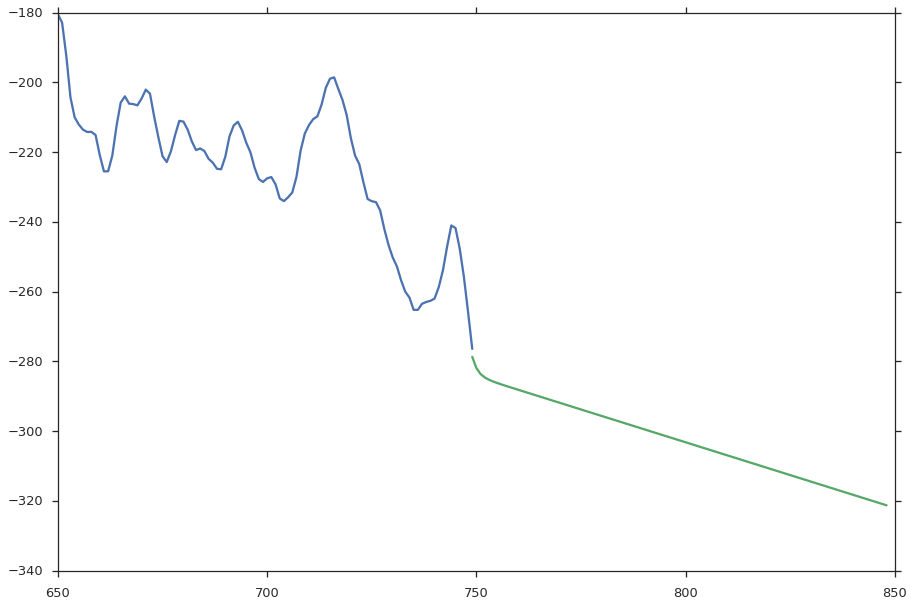

In [527]:
#zoom in
plt.figure(figsize=(15, 10))
pred = pd.DataFrame(results_ARIMA_4.forecast(steps=100)[0])
pred.index = range(df_timeSeries1.index[-1], df_timeSeries1.index[-1]+100)
plt.plot(df_timeSeries1['x'][-100:])
plt.plot(pred);

<a id ='Problem-5'></a>

## Problem 5  Time Series Modeling B (18 points)
Use the data timeSeries2.csv for this problem.  The data are monthly reports of production.

[Back to top](#top)

### Problem 5a 

<a id="Problem-5a"></a>
Plot the data and perform an exploratory analysis on the raw time series file.  Comment on any trends, outliers, seasonality, whether it's stationary, etc. 

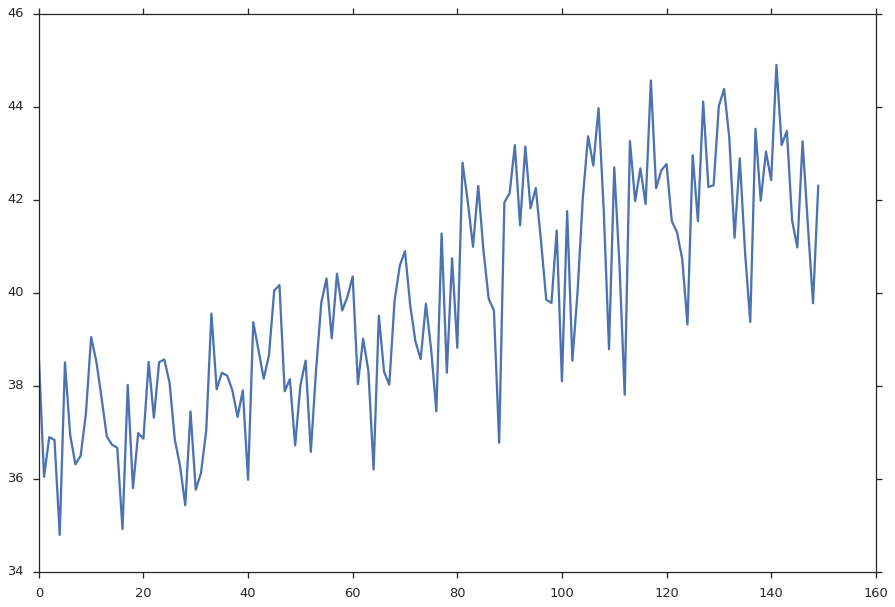

In [528]:
#simple plot 
plt.figure(figsize=(15, 10))
plt.plot(df_timeSeries2['x'])

###### *Obeservation:*

It is clearly that there is an overall increasing trend in the data along with significant seasonal variations.

Next, we plot the pattern of ACF and PACF for original data.

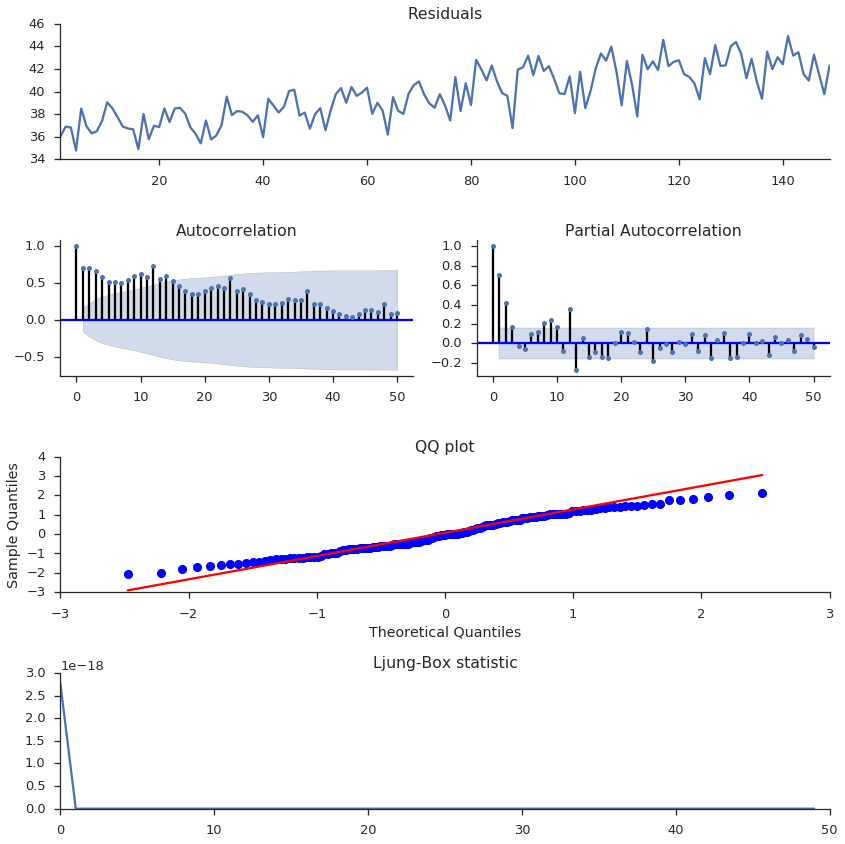

In [77]:
_ = tsplot(df_timeSeries2['x'] , 50)

In [78]:
# Dickey-Fuller Test for stationarity
test_stationarity(df_timeSeries2['x'])

Results of Dickey-Fuller Test:
Test Statistic                  -0.632000
p-value                          0.863586
#Lags Used                      13.000000
Number of Observations Used    135.000000
Critical Value (10%)            -2.578320
Critical Value (1%)             -3.479743
Critical Value (5%)             -2.883198
dtype: float64


###### *Observation:*

ACF and PACF pattarn together with test statistic from Dickey-Fuller Test are consictant with our first impression of this dataset: 

1. Data series has positive autocorrelations (AFC) out to a high number of lags, indicating a tend in the dataset, so differencing is needed.

2. Periodicity peacks in ACF plot indeicates the dataset is seasonal.

3. The test statistic in Dickey-Fuller Test is much higher than the critical values. So the origin data is not a stationary series.

Next, we will try to use differencing and log differencing to make the data series stationary inorder to fit a sesonal ARIMA model (SARIMA).


In [530]:
df_timeSeries2['logx'] = np.log(df_timeSeries2['x']) 
df_timeSeries2['dx']= df_timeSeries2['x'].diff() # differencing 
df_timeSeries2['dlogx']= df_timeSeries2['logx'].diff() #log differencing.
df_timeSeries2.dropna(inplace=True)
df_timeSeries2.head()
print(df_timeSeries2.shape)

(149, 5)


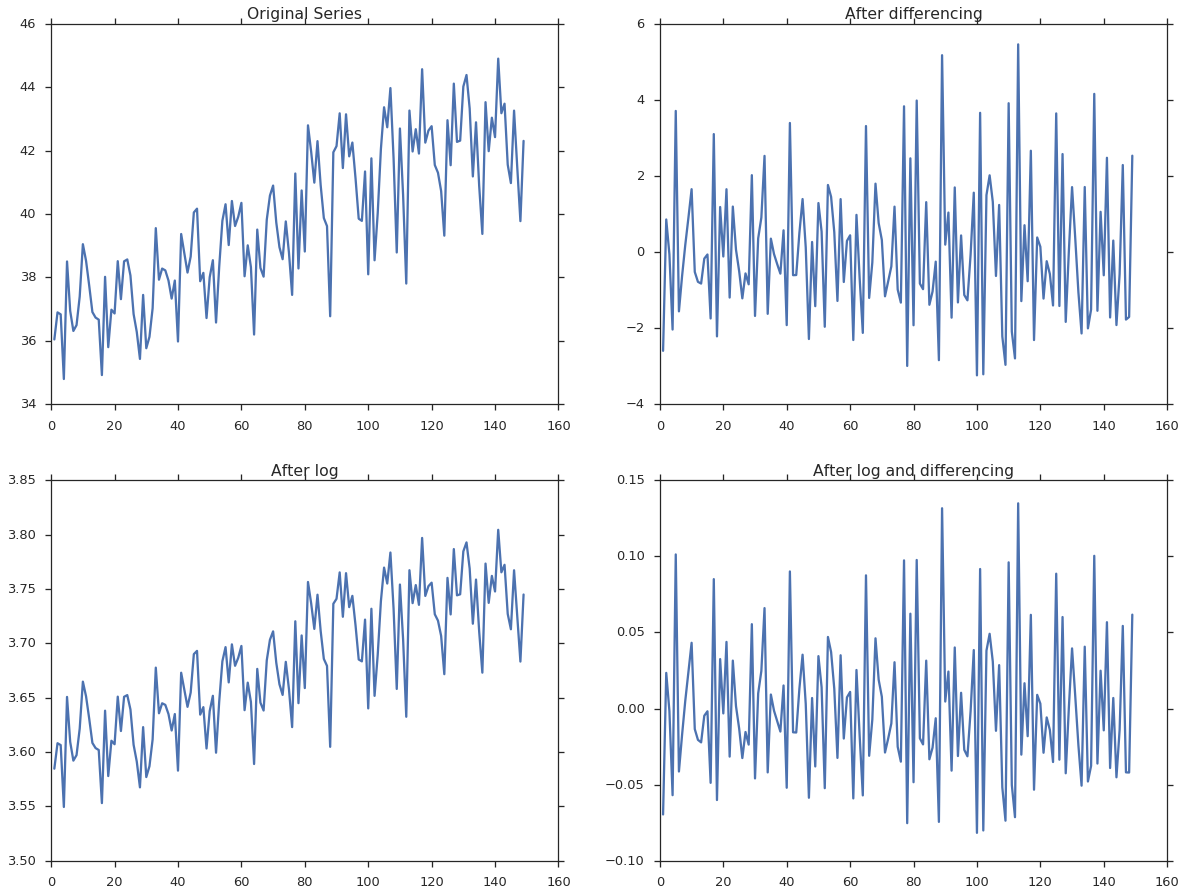

In [531]:
#Plot original data and transformed data
f, ax = plt.subplots(2, 2,figsize=(20, 15))
ax[0,0].plot(df_timeSeries2['x']);
ax[0,0].set_title('Original Series')

ax[0,1].plot(df_timeSeries2['dx']);
ax[0,1].set_title('After differencing')

ax[1,0].plot(df_timeSeries2['logx']);
ax[1,0].set_title('After log');

ax[1,1].plot(df_timeSeries2['dlogx']);
ax[1,1].set_title('After log and differencing');

In [532]:
# Dickey-Fuller Test for stationarity
test_stationarity(df_timeSeries2['dx'])

Results of Dickey-Fuller Test:
Test Statistic                -7.146077e+00
p-value                        3.230238e-10
#Lags Used                     1.200000e+01
Number of Observations Used    1.360000e+02
Critical Value (10%)          -2.578234e+00
Critical Value (1%)           -3.479372e+00
Critical Value (5%)           -2.883037e+00
dtype: float64


In [81]:
# Dickey-Fuller Test for stationarity
test_stationarity(df_timeSeries2['dlogx'])

Results of Dickey-Fuller Test:
Test Statistic                -7.106072e+00
p-value                        4.050667e-10
#Lags Used                     1.200000e+01
Number of Observations Used    1.350000e+02
Critical Value (10%)          -2.578320e+00
Critical Value (1%)           -3.479743e+00
Critical Value (5%)           -2.883198e+00
dtype: float64


###### *Observation:*

After differencing the original data and log data, the trend was removed. Dickey-Fuller Test also indicates the two transformed datasets is stationary. We will use differencing data ('dx') for the following analysis.

##### plot ACF and PACF for differentiated data sequence

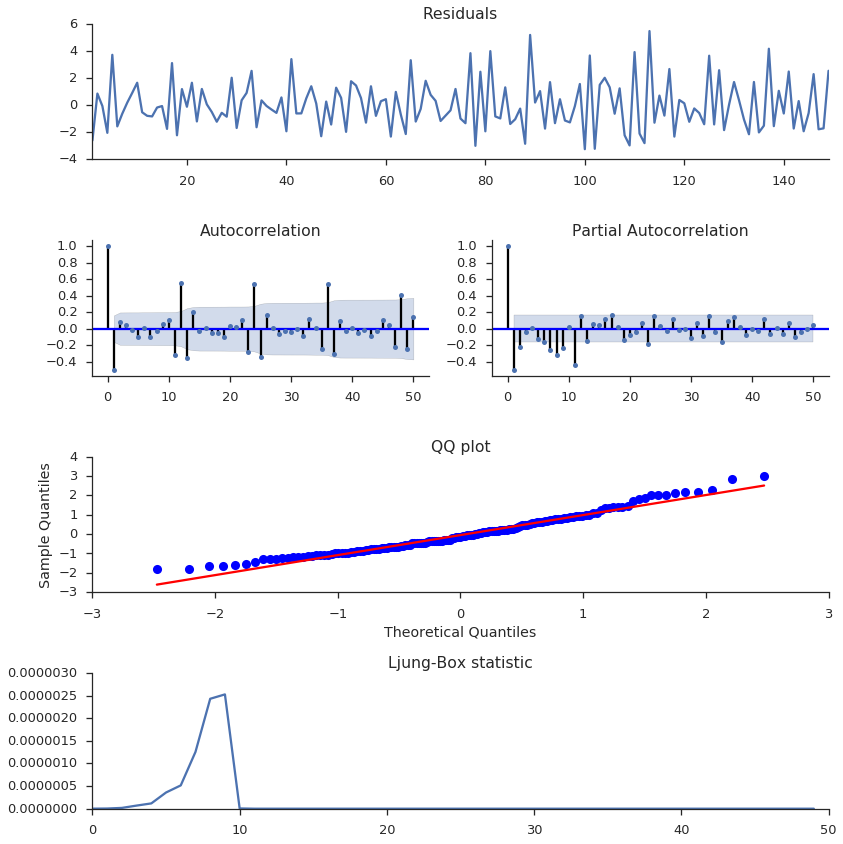

In [533]:
_ = tsplot(df_timeSeries2['dx'] , 50)

##### decompose the original data with trend and a seasonal frequency = 12

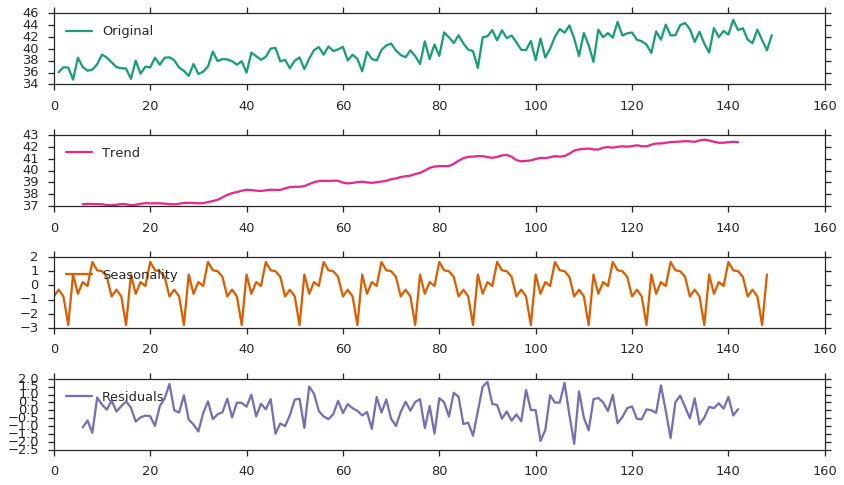

In [535]:
decomposition = seasonal_decompose(df_timeSeries2['x'].values, freq=12) 

f, ax = plt.subplots(1,4,figsize=(12, 7))

plt.subplot(411)
plt.plot(df_timeSeries2['x'], label='Original', c=dark2_colors[0])
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', c=dark2_colors[1])
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal,label='Seasonality', c=dark2_colors[2])
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', c=dark2_colors[3])
plt.legend(loc='upper left')
plt.tight_layout()

##### plot residual after decomposion

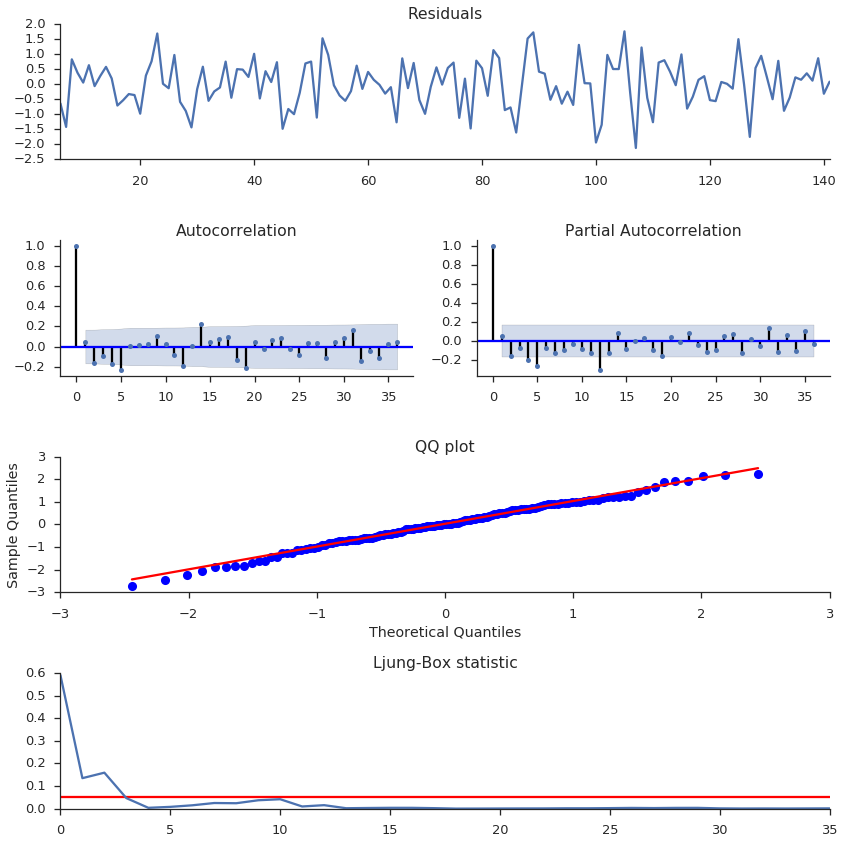

In [85]:
decomp_resid = pd.Series(decomposition.resid)
decomp_resid.dropna(inplace=True)
_ = tsplot(decomp_resid, 36)

### Problem 5b

[back to top](#top)

<a id="Problem-5b"></a>

Using your knowledge of ACF, PACF and other diagnostics, walk us through the selection of an appropriate time series model for the data.  We are interested in both the result and your logical journey to reach that model.  The insight-free brute force method of trying every possible model is not what we are looking for here.  You don't have to include the final equation but do include the ARIMA form of the best model.

#### Parameter selection

1. In the ACF and PACF plot in differenced series (dx), ACF value of each n*s ( s is the s the number of periods in a season, n*s are 12 ,24, 36,...) is positive and decays with lag, while ACF value is significant around 12 These observations indicate an SAR(1) term and an SMA(1) term to the model. 

2. Within each s period, ACF and PACF values tend to decay to 0, indicating a AR(1) and MA(1) model.  Some values seems do not have this trend, but will try AR(1) and MA(1) first to avoid introducing high value parameter into the final model.

3. d =1 for the ARIMA model part

4. for d in seasonal part, will try d=1 first


In [631]:
mod = sm.tsa.statespace.SARIMAX(df_timeSeries2['x'].values, order=(1,1,1), seasonal_order=(1,1,1,12))#, simple_differencing=True)
results_SARIMA = mod.fit()
print (results_SARIMA.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  149
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -191.258
Date:                            Sat, 30 Sep 2017   AIC                            392.515
Time:                                    22:13:25   BIC                            407.535
Sample:                                         0   HQIC                           398.617
                                            - 149                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1500      0.099      1.518      0.129      -0.044       0.344
ma.L1         -0.9054      0.061   

### Problem 5c

[back to top](#top)

<a id="Problem-5c"></a>

Apply and show the appropriate diagnostics to the model to assert that it is valid.  Include not just a plot but your interpretation of the plot in your justification.

##### plot residual to diagnose the SARIMA model

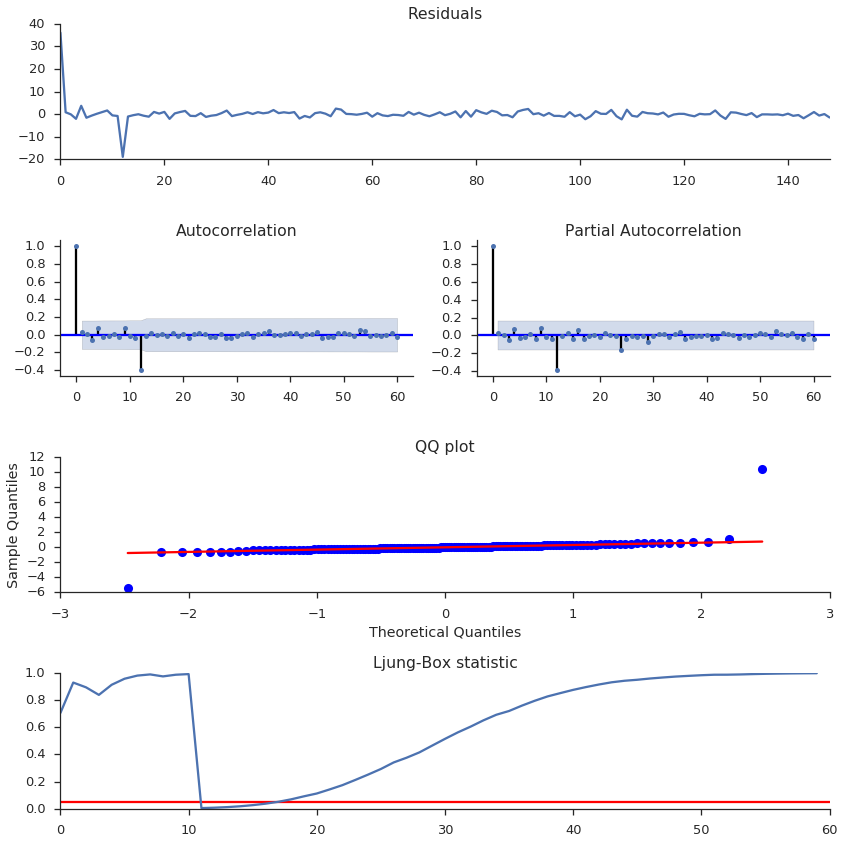

In [632]:
resid_s = pd.Series(results_SARIMA.resid)
_ = tsplot(resid_s, 60)

###### *Observation:*

1. The autocorrelation plot (ACF and PACF) shows negative value in lag = 12

2. Ljung-Box statistic drop below 0.05 threshold around log = 12

All indicate there might be over differentiation in seasonal pattern

##### Next,  d= 0 is tested for seasnal part, then the model will be SARIMA(1,1,1)(1,0,1, 12)

In [642]:
mod = sm.tsa.statespace.SARIMAX(df_timeSeries2['x'].values, order=(1,1,1), seasonal_order=(1,0,1,12))#, simple_differencing=True)
results_SARIMA = mod.fit()
print (results_SARIMA.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  149
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -211.186
Date:                            Sat, 30 Sep 2017   AIC                            432.371
Time:                                    22:17:18   BIC                            447.391
Sample:                                         0   HQIC                           438.473
                                            - 149                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1705      0.092      1.850      0.064      -0.010       0.351
ma.L1         -0.9109      0.050   

###### diagnose part

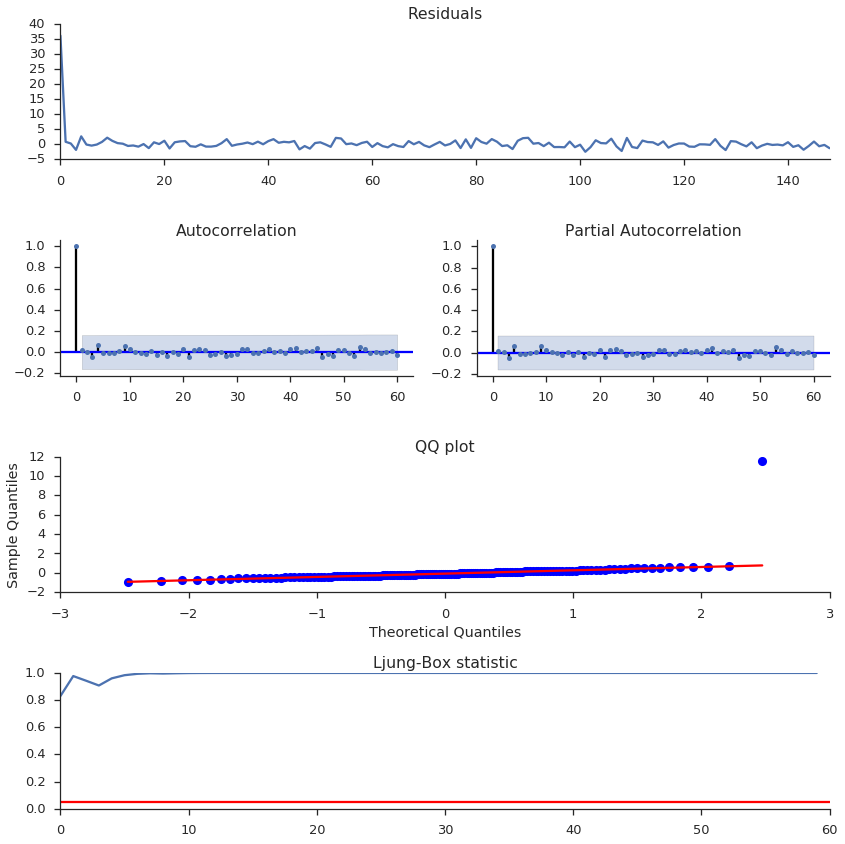

In [643]:
resid_s = pd.Series(results_SARIMA.resid)
_ = tsplot(resid_s, 60)

###### *Observation fro the new model SARIMA(1,1,1)(1,0,1, 12) *

1. The run sequence plot of residuals shows that most residuals do not violate the assumption of constant location and scale.

2. The autocorrelation plot (ACF and PACF) shows that for the first 60 lags, all sample autocorrelations fall inside the margin of 95 % confidence bounds. These abservations indicates the residuals appear to be nearly random.

3. QQ plot of residuals shows that almost all dots lie on the y =x line, indicating that the residuals appear to be nearly random

4. We apply the Ljung-Box test to the residuals to determine whether residuals are random. The result shows that for the first 60 lag, all Ljung_Box statistic are far above the lien of 0.05 threshold, indicating that the residuals are random.

###### *Conclusion based on diagnose:*

The SARIMA(1,1,1)(1,0,1,12) model provides an adequate fit to the data

###### Equation for model ARIMA(1,1,1) is:

$X_t = c +  X_{t-1} + \phi_1 (X_{t-1} - X_{t-2}) + \epsilon_t + \alpha_1 \epsilon_{t-1}$

$c$ is  a constant and $\epsilon$ is the white noise $∼ IID(0, \sigma^2)$.


### Problem 5d

[back to top](#top)

<a id="Problem-5d"></a>
Predict and plot the next 20 data points.

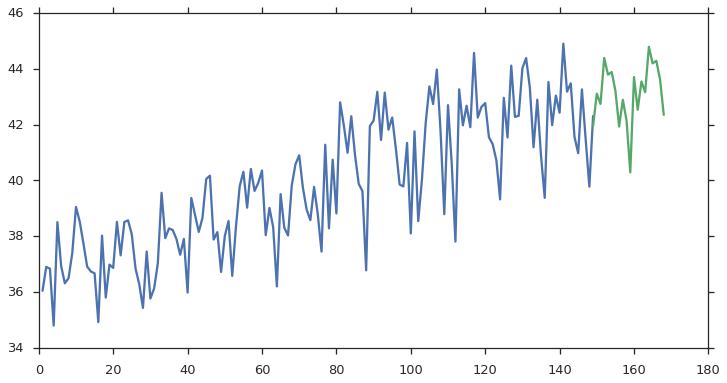

In [644]:
fig, ax = plt.subplots(figsize=(12,6))
pred = pd.DataFrame(results_SARIMA.forecast(steps=20, dynamic= True))
pred.index = range(df_timeSeries2.index[-1], df_timeSeries2.index[-1]+20)
plt.plot(df_timeSeries2['x'])
plt.plot(pred);

###### Observation: The next predicted 20 data point have the similar seasonal pattern as the real data.

## Optional Exploratory Points (individual or partner)

Find an interesting time series data set that we cannot find in a time series textbook, lecture, etc. and model it.  Be sure to cite its source.

Explore ways of showing that your clustering scheme in Problem 1 or 2 is correct, interesting, etc.

Code one of the clustering techniques (excluding K-means and its variants) from your understanding of the algorithm and prove that it works.  This is the best way of really finding out how these methods works.  Searching for code online and dummying it down would defeat the purpose.  Translating code from another language could earn some points.